## Initializing a model

We start (preferably on jupyter notebook) importing the module and creating our cosmology object:

In [1]:
from EPIC.cosmology import cosmic_objects as cosmo
LCDM = cosmo.CosmologicalSetup('lcdm')

Only the label of the model is really needed here, since the essentials are already predefined in the program, as mentioned above.
With this, one can explore the properties assigned to the object. For example, ``LCDM.model`` will print ``lcdm``.
``LCDM.species`` is a dictionary of ``Fluid`` objects identified by the components labels, in this case ``cdm`` and ``lambda``.
There is also a dedicated class for an equation-of-state parameter or function, which becomes an attribute of its fluid.
We can assess its value, type, etc. ``LCDM.species['lambda'].EoS.value`` will print ``-1``.

But let us proceed in a slightly different way, setting up our model with some options.
Since we predominantly work with flat cosmologies (in fact, curvature is not supported yet in the current version), the flatness condition is imposed in the density parameter of one of the fluids. We will choose the dark energy density parameter to be the derived parameter, but we could have chosen dark matter as well.
Also, by default, the code prefers to work with physical densities (for example $\Omega_{c0} h^2$) rather than the common $\Omega_{c0}$. 
You can change this with the option ``physical=False``.
We will add the radiation and matter fluids. Note that this will override the optional inclusion of baryons and remove them, if given.
The radiation fluid is parametrized by the temperature of the cosmic microwave background.
The model will have three free parameters: the physical density parameter of matter ($\Omega_{m0}h^2$), the CMB temperature ($T_{\gamma}$, which we usually keep fixed) and the Hubble parameter $h$; and one derived parameter, which is the density parameter of the cosmological constant, $\Omega_{\Lambda}h^2$.

In [2]:
LCDM = cosmo.CosmologicalSetup(
    'lcdm',
    optional_species=['baryons', 'radiation'], # baryons will be ignored because of 'matter' in the line bellow
    combined_species=['matter'],
    derived='lambda'
)

We can then obtain the solution to the background cosmology with EPIC.

### Solving the background cosmology

It is as simple as this:

In [3]:
LCDM.solve_background(accepts_default=True)

Normally, a set of parameters would be given to this function in the form of a dictionary with the parameters' labels as keys, like in ``parameter_space={'Oc0': 0.26, 'Ob0': 0.048, 'Or0':8e-5, 'H0':67.8}``. However, we can also ommit it and turn on the option ``accepts_default`` and then the default values defined in the ``EPIC/cosmology/default_parameter_values.ini`` file will be used for the parameters.
Next, we plot the energy densities and density parameters. Here I do it in a jupyter notebook with the help of this simple function below:

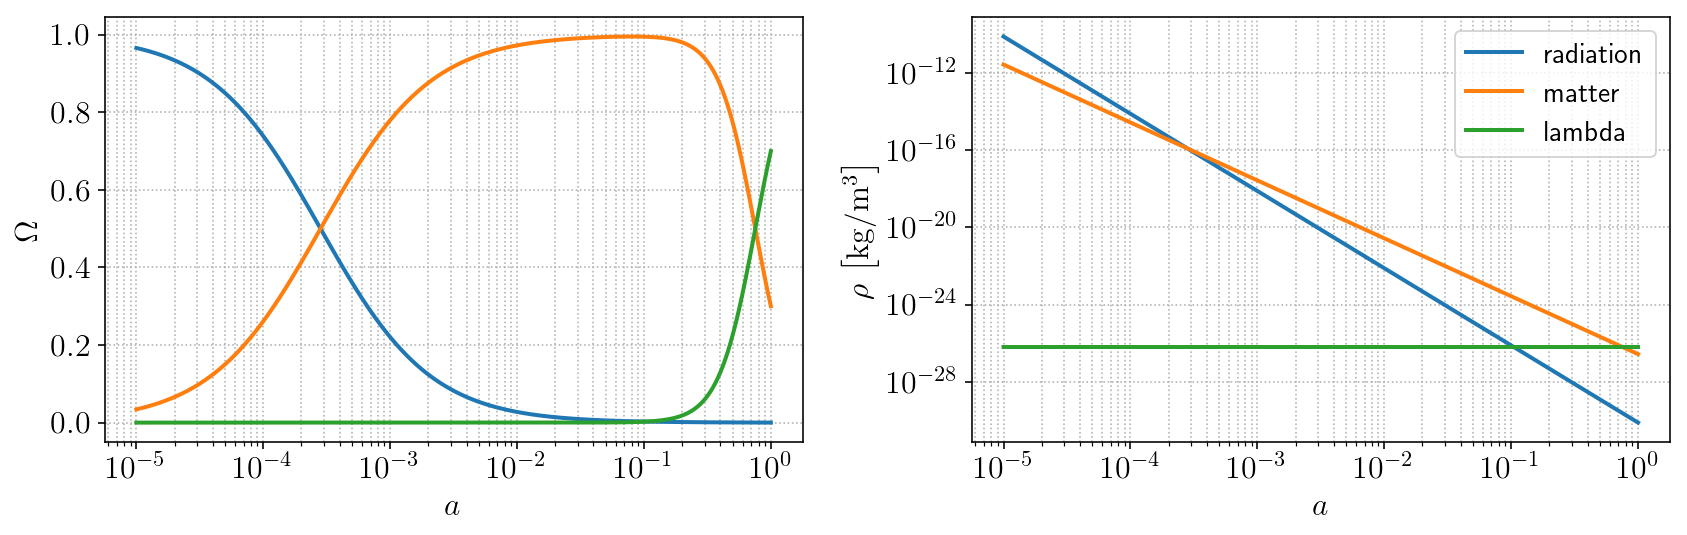

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 16
plt.rcParams['figure.dpi'] = 144


def show_densities(model, **kwargs):
    from EPIC.cosmology import rho_critical_SI
    hubble = model.HubbleParameter.get_value(**kwargs)
    rho_cr0 = rho_critical_SI(
        hubble * (100 if model.physical_density_parameters else 1)
    )
    fig, ax = plt.subplots(1, 2)
    fig.set_size_inches(12, 4)
    for key in model.background_solution_Omegas.keys():
        ax[0].plot(model.a_range, model.background_solution_Omegas[key], lw=2, label=key)
        ax[1].plot(model.a_range, rho_cr0 \
                   * (hubble**-2 if model.physical_density_parameters else 1) \
                   * model.background_solution_rhos[key], lw=2, label=key)
    ax[0].set_xscale('log')
    ax[0].set_ylabel(r'$\Omega$')
    ax[0].set_xlabel(r'$a$')
    ax[0].grid(which='both', linestyle=':')
    #ax[0].legend()
    ax[1].set_xscale('log')
    ax[1].set_yscale('log')
    ax[1].set_ylabel(r'$\rho \, \left[ \rm{kg}/\rm{m}^3 \right]$')
    ax[1].set_xlabel(r'$a$')
    ax[1].grid(which='both', linestyle=':')    
    ax[1].legend(fontsize=14)
    fig.tight_layout()

show_densities(LCDM, accepts_default=True)

Notice the matter-radiation equality moment at $a_{eq} \sim 3 \times 10^{-4}$ and the cosmological constant that just recently came to overtake matter as the dominant component.
The $w\text{CDM}$ (``wcdm``) model differs from $\Lambda\text{CDM}$ only by the dark energy (``de``) equation-of-state parameter (``wd``), which although still constant can be different from $-1$. Note that the energy density of dark energy is not constant now:

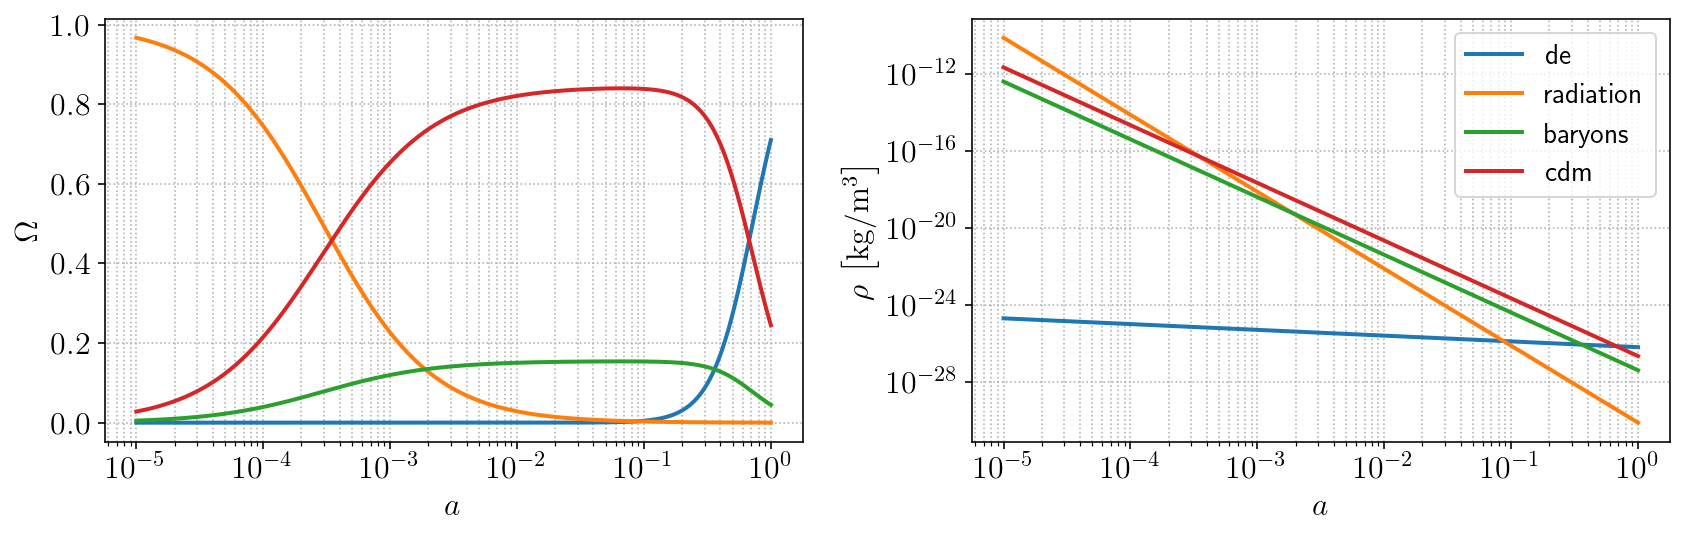

In [5]:
wCDM = cosmo.CosmologicalSetup(
    'wcdm',
    optional_species=['baryons', 'radiation'],
    derived='de'
)

parameters = {
    'h': 0.7, 
    'Och2': 0.12,
    'Obh2': 0.022,
    'wd': -0.9,
    'T_CMB': 2.725
}

plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 16
plt.rcParams['figure.dpi'] = 144
wCDM.solve_background(parameter_space=parameters)
show_densities(wCDM, parameter_space=parameters)